In [258]:
import pandas as pd
import geopandas as gpd
import requests
import zipfile
import io
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df=pd.read_csv('../Data/ny_od_main_JT00_2019.csv.gz')
df

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,360010001001004,360010002004006,1,1,0,0,0,0,1,0,0,1,20211018
1,360010001001004,360930320001020,1,0,1,0,0,0,1,0,0,1,20211018
2,360010001001005,360010002003009,1,1,0,0,0,0,1,1,0,0,20211018
3,360010001001005,360010007003002,1,0,1,0,0,0,1,1,0,0,20211018
4,360010001001005,360010021002003,1,0,0,1,0,0,1,0,1,0,20211018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836552,361231505004020,361231505003007,1,0,1,0,0,1,0,0,1,0,20211018
7836553,361231505004020,361231505003010,1,0,1,0,0,0,1,0,1,0,20211018
7836554,361231505004020,361231505003016,1,0,0,1,0,1,0,0,1,0,20211018
7836555,361231505004023,360550113012014,1,0,0,1,0,0,1,0,0,1,20211018


In [74]:
df['h_geocode_ct']=df.h_geocode.astype(str).str[:-4].astype(int) #aggregate from CBG to Census tract
df['w_geocode_ct']=df.w_geocode.astype(str).str[:-4].astype(int)
OD_df=df[['h_geocode_ct','w_geocode_ct','S000']].groupby(['h_geocode_ct','w_geocode_ct']).sum().unstack()
OD_df.columns=OD_df.columns.droplevel(0)
OD_df=OD_df.fillna(0)
OD_df

w_geocode_ct,36001000100,36001000200,36001000300,36001000401,36001000403,36001000404,36001000501,36001000502,36001000600,36001000700,...,36121970700,36121970800,36121970900,36121971000,36121971100,36123150100,36123150200,36123150300,36123150400,36123150500
h_geocode_ct,,,,,,,,,,,,,,,,,,,,,
36001000100,17.0,26.0,31.0,21.0,13.0,0.0,3.0,7.0,7.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36001000200,19.0,77.0,77.0,58.0,26.0,0.0,18.0,8.0,8.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36001000300,9.0,26.0,117.0,70.0,55.0,7.0,12.0,19.0,13.0,54.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
36001000401,2.0,16.0,24.0,41.0,45.0,7.0,3.0,5.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36001000403,8.0,23.0,57.0,64.0,114.0,8.0,20.0,14.0,17.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36123150100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,7.0,0.0,423.0,190.0,8.0,47.0,153.0
36123150200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,128.0,505.0,42.0,197.0,209.0
36123150300,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,8.0,0.0,25.0,144.0,157.0,54.0,58.0


In [75]:
# OD_df.to_csv('../Data/OD_alljobs.csv') #dataframe of O-D commutes

In [76]:
CBD_df=df[['w_geocode_ct','S000']].groupby(['w_geocode_ct']).sum()
CBD_df.head() #of people who commute to each census tract

,S000
w_geocode_ct,
36001000100,1452
36001000200,3064
36001000300,11220
36001000401,9036
36001000403,10752


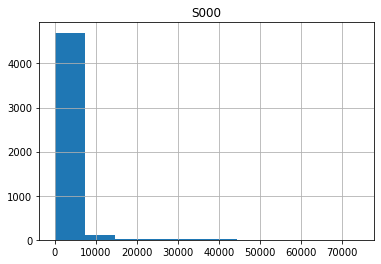

In [77]:
CBD_df.hist(); #histogram of total # of jobs

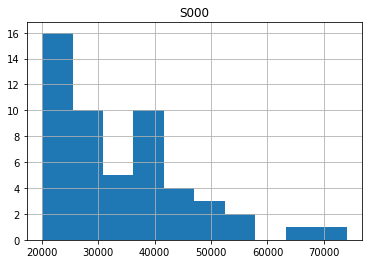

In [78]:
CBD_df[CBD_df['S000']>20000].hist(); # hist zoomed in to CTs with over 20,000 jobs

In [79]:
# url = 'http://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_36_tract_500k.zip'
# local_path = 'geo_files/'
# print('Downloading shapefile...')
# r = requests.get(url)
# z = zipfile.ZipFile(io.BytesIO(r.content))
# print("Done")
# z.extractall(path=local_path) # extract to folder
# filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 

# dbf, prj, shp, shx = [filename for filename in filenames]

county = gpd.read_file('../Data/geo_files/cb_2020_36_tract_500k.shp')
print("Shape of the dataframe: {}".format(county.shape))
print("Projection of dataframe: {}".format(county.crs))

nyc_CT=county[county.NAMELSADCO.isin(['Bronx County','Kings County', 'Queens County','New York County'])]
nyc_CT.set_crs(4269,allow_override=True)
nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
nyc_CT.head(n=2)
nyc_CT.GEOID=nyc_CT.GEOID.astype(int)

Shape of the dataframe: (5394, 14)
Projection of dataframe: epsg:4269


<ipython-input-79-17050e5915b3>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
/Users/callieclark/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [80]:
nyc_cbd=CBD_df.merge(nyc_CT,how='right',left_on='w_geocode_ct',right_on='GEOID') #merge LEHD data with geodata
nyc_cbd['S000_area_norm']=nyc_cbd['S000']/nyc_cbd['ALAND'] #create jobs/area variable to normalize
nyc_cbd=nyc_cbd.sort_values(by='S000_area_norm',ascending=False)
nyc_cbd = gpd.GeoDataFrame(nyc_cbd, geometry='geometry')
print('Total Jobs: ',nyc_cbd['S000'].sum())

Total Jobs:  3520137.0


In [81]:
nyc_cbd.head()

,S000,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,centroid,S000_area_norm
1899,74028.0,36,061,010900,1400000US36061010900,36061010900,109,Census Tract 109,NY,New York County,New York,CT,175741,0,"POLYGON ((-73.99298 40.75285, -73.99253 40.753...",POINT (-73.98970 40.75225),0.421234
1012,67041.0,36,047,001100,1400000US36047001100,36047001100,11,Census Tract 11,NY,Kings County,New York,CT,168507,0,"POLYGON ((-73.99045 40.69373, -73.99066 40.694...",POINT (-73.98771 40.69329),0.397853
117,52535.0,36,061,011900,1400000US36061011900,36061011900,119,Census Tract 119,NY,New York County,New York,CT,177591,0,"POLYGON ((-73.98930 40.75791, -73.98884 40.758...",POINT (-73.98602 40.75732),0.295820
1785,51265.0,36,061,010100,1400000US36061010100,36061010100,101,Census Tract 101,NY,New York County,New York,CT,175520,0,"POLYGON ((-73.99484 40.75029, -73.99395 40.751...",POINT (-73.99154 40.74973),0.292075
572,41809.0,36,061,009400,1400000US36061009400,36061009400,94,Census Tract 94,NY,New York County,New York,CT,152754,0,"POLYGON ((-73.98040 40.75415, -73.97994 40.754...",POINT (-73.97775 40.75523),0.273702


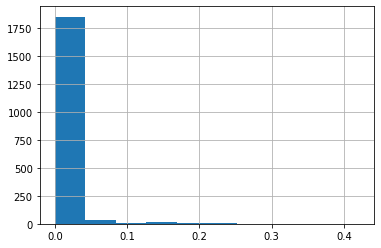

In [82]:
nyc_cbd['S000_area_norm'].hist();

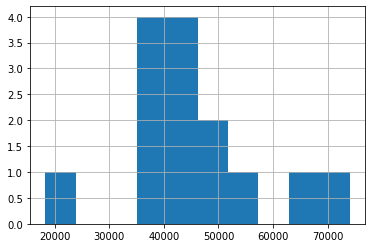

In [83]:
nyc_cbd[nyc_cbd['S000_area_norm']>0.2]['S000'].hist();

In [84]:
#five CBDs
jobs_in_cbd=nyc_cbd.head(n=5)['S000'].sum()
print('Percent of Jobs in 5 CBDS',jobs_in_cbd/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in 5 CBDS 8.143944397618617 %


In [85]:
#10 CBDs
jobs_in_cbd=nyc_cbd.head(n=10)['S000'].sum()
print('Percent of Jobs in 10 CBDS',jobs_in_cbd/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in 10 CBDS 13.636202227356492 %


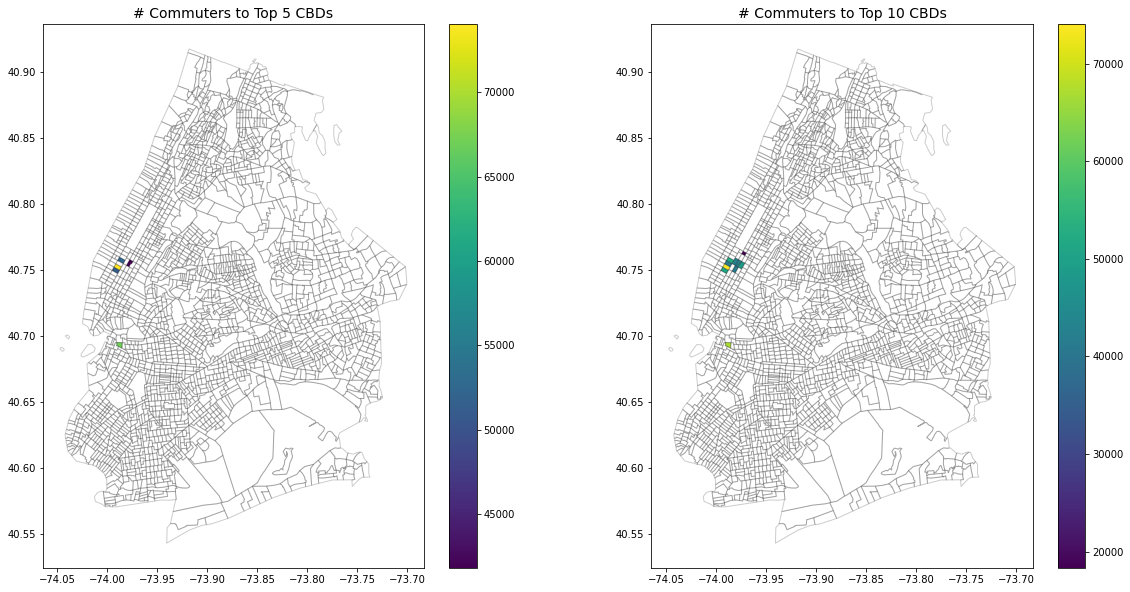

In [86]:
fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd.head(n=5).plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd.head(n=10).plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('# Commuters to Top 5 CBDs',fontsize=14);
ax2.set_title('# Commuters to Top 10 CBDs',fontsize=14);

In [87]:
#CBDS with over 15,000 jobs
print('Percent of Jobs in CBDS with over 15,000 jobs',nyc_cbd[nyc_cbd['S000']>15000]['S000'].sum()/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in CBDS with over 15,000 jobs 40.502202044977224 %


In [88]:
#CBDS with over 15,000 jobs
print('Percent of Jobs in CBDS with density > 0.2 jobs/m^2 ',nyc_cbd[nyc_cbd['S000_area_norm']>0.2]['S000'].sum()/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in CBDS with density > 0.2 jobs/m^2  18.029980083161536 %


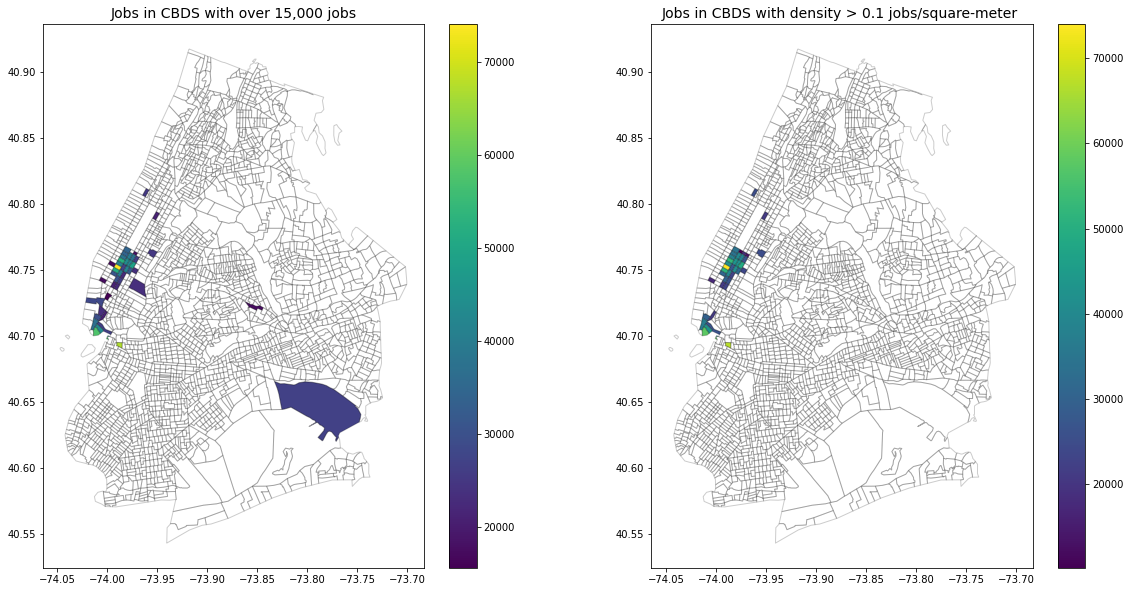

In [89]:


fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd[nyc_cbd['S000']>15000].plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd[nyc_cbd['S000_area_norm']>0.1].plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('Jobs in CBDS with over 15,000 jobs',fontsize=14);
ax2.set_title('Jobs in CBDS with density > 0.1 jobs/square-meter ',fontsize=14);

In [90]:
#nyc_cbd[['GEOID','S000','geometry', 'centroid']].head(n=10).to_csv('Top_10_CBDs.csv')

<AxesSubplot:>

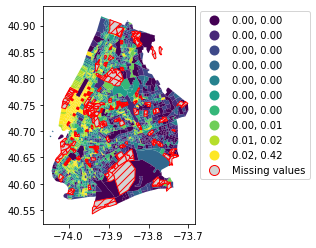

In [91]:
nyc_cbd.plot(column = 'S000_area_norm',k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})

<AxesSubplot:>

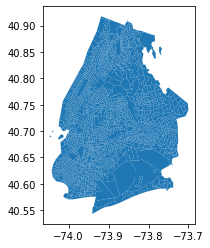

In [92]:
nyc_CT.plot()

<AxesSubplot:>

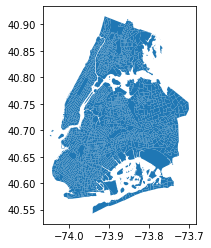

In [93]:
tracts_gdf = gpd.read_file('../Data/2010_Census_Tracts/2010_Census_Tracts.shp')
tracts_gdf.plot()

In [94]:
tracts_gdf.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
1,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,36061010200,40.759424,-73.974449,0.172893,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
2,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.03636707,1864600.43538,36061010400,40.760779,-73.977673,0.173228,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
3,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,5699.86064037,1890907.25105,36061011300,40.754775,-73.987870,0.175672,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."
4,130,1,Manhattan,013000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.97295649,1918144.56374,36061013000,40.772736,-73.964734,0.178202,"POLYGON ((-73.96148 40.77432, -73.96194 40.773..."


In [95]:
tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [96]:
tracts_gdf['geoid']=tracts_gdf.geoid.astype(int)
nyc_cbd=CBD_df.merge(tracts_gdf,how='right',left_on='w_geocode_ct',right_on='geoid') #merge LEHD data with geodata
nyc_cbd['S000_area_norm']=nyc_cbd['S000']/nyc_cbd['area_km2'] #create jobs/area variable to normalize
nyc_cbd=nyc_cbd.sort_values(by='S000_area_norm',ascending=False)
nyc_cbd = gpd.GeoDataFrame(nyc_cbd, geometry='geometry')
print('Total Jobs: ',nyc_cbd['S000'].sum())

Total Jobs:  3913207.0


In [97]:
nyc_cbd.head()

,S000,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry,S000_area_norm
801,74028.0,109,1,Manhattan,010900,1010900,I,MN17,Midtown-Midtown South,3807,5703.53176931,1891364.71422,36061010900,40.752251,-73.989703,0.175714,"POLYGON ((-73.98595 40.75232, -73.98640 40.751...",421297.658624
1331,67041.0,11,3,Brooklyn,001100,3001100,I,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,4004,5760.45786031,1814229.80572,36047001100,40.693292,-73.987710,0.168549,"POLYGON ((-73.98514 40.69489, -73.98517 40.694...",397754.315022
415,52535.0,119,1,Manhattan,011900,1011900,I,MN17,Midtown-Midtown South,3807,5722.09058919,1911310.53405,36061011900,40.757315,-73.986025,0.177567,"POLYGON ((-73.98226 40.75739, -73.98271 40.756...",295859.700609
866,51265.0,101,1,Manhattan,010100,1010100,I,MN17,Midtown-Midtown South,3807,5701.71560662,1891377.71142,36061010100,40.749731,-73.991537,0.175716,"POLYGON ((-73.98777 40.74979, -73.98797 40.749...",291749.385069
797,41809.0,94,1,Manhattan,009400,1009400,I,MN17,Midtown-Midtown South,3807,5738.94000015,1646379.18573,36061009400,40.755227,-73.977744,0.152954,"POLYGON ((-73.97444 40.75656, -73.97489 40.755...",273343.169158


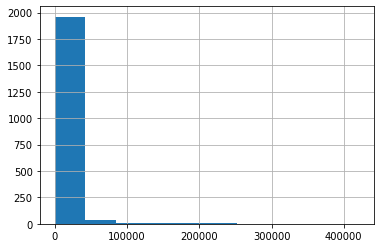

In [98]:
nyc_cbd['S000_area_norm'].hist();

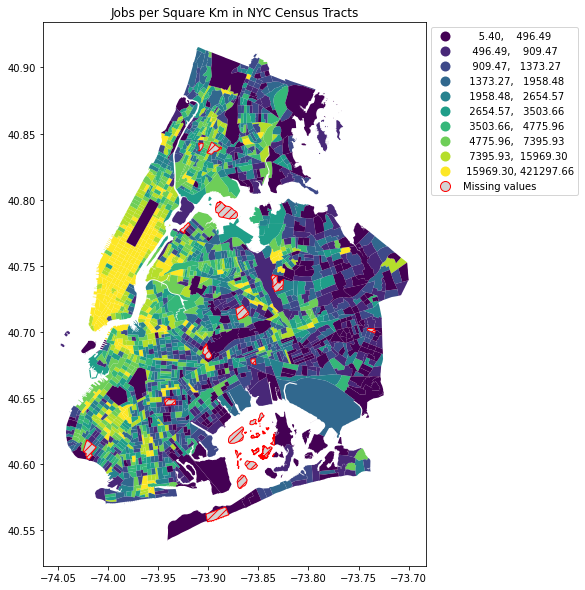

In [99]:
fig, ax = plt.subplots(figsize = (10,10))
nyc_cbd.plot(column = 'S000_area_norm',ax = ax, k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})
plt.title('Jobs per Square Km in NYC Census Tracts')
plt.show()

In [100]:
# find top 10 percent
# Calculate the 90th percentile of the jobs_per_km column
jobs_per_km_threshold = nyc_cbd["S000_area_norm"].quantile(0.99)
print(jobs_per_km_threshold)
# # Create a new DataFrame with only the rows where jobs_per_km is in the top 10%
# top10_nyc_cbd = nyc_cbd[nyc_cbd["jobs_per_km"] >= jobs_per_km_threshold]

166870.06693971396


In [101]:
len(nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold])

21

In [102]:
#percent of total jobs
nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold]['S000'].sum()/nyc_cbd['S000'].sum()

0.22419156461694972

In [103]:
quant_thresh = pd.DataFrame(columns = ['Quantile', 'Jobs Threshold','Tracts', '% Total Jobs'])
quantiles = [0.75, 0.80, 0.85, 0.90, 0.95, 0.99]

for quantile in quantiles:
    jobs_per_km_threshold = nyc_cbd["S000_area_norm"].quantile(quantile)
    tract_count = len(nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold])
    perc_tot = nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold]['S000'].sum()/nyc_cbd['S000'].sum()
    
    # Append the results to the quant_thresh DataFrame
    quant_thresh.loc[len(quant_thresh)] = [quantile, jobs_per_km_threshold, tract_count, perc_tot]
quant_thresh

,Quantile,Jobs Threshold,Tracts,% Total Jobs
0,0.75,5857.650495,511.0,0.773890
1,0.80,7395.931497,409.0,0.730035
2,0.85,9862.789438,307.0,0.684078
3,0.90,15969.299915,205.0,0.624530
4,0.95,33147.539607,103.0,0.503975
5,0.99,166870.066940,21.0,0.224192


In [104]:
Top1 = nyc_cbd[nyc_cbd["S000_area_norm"] >= nyc_cbd["S000_area_norm"].quantile(0.99)]

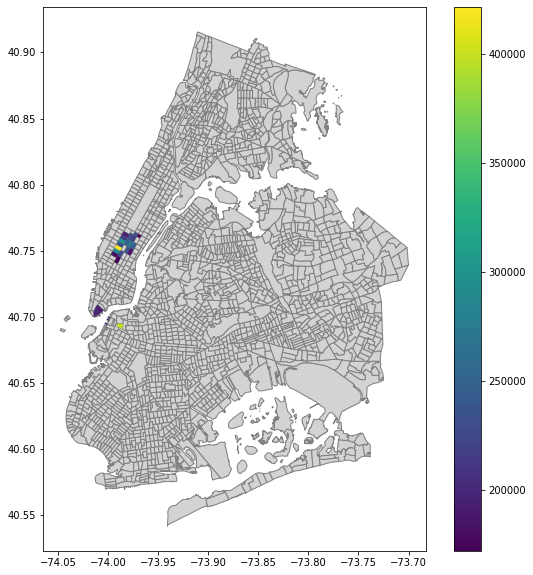

In [105]:
fig,ax = plt.subplots(figsize=(10,10)) #standardize scale!!
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'grey')
Top1.plot(ax = ax, column='S000_area_norm', legend=True)
plt.show()

In [106]:
#try new LEHD data source
LEHD = gpd.read_file('../Data/otm_aab0d71ba7d8441790c44b03a32c97dd/points_2019.shp')
LEHD.head()

,id,c000,ca01,ca02,ca03,ce01,ce02,ce03,cns01,cns02,...,cr07,ct01,ct02,cd01,cd02,cd03,cd04,cg01,cg02,geometry
0,360050144006004,15.0,9.0,6.0,0.0,12.0,3.0,0.0,0.0,0.0,...,0.0,1.0,14.0,4.0,1.0,1.0,0.0,13.0,2.0,POINT (1838668.125 587697.312)
1,360810473002006,228.0,56.0,116.0,56.0,65.0,82.0,81.0,0.0,0.0,...,5.0,182.0,46.0,44.0,19.0,37.0,72.0,88.0,140.0,POINT (1836180.125 577529.438)
2,360810510001005,3.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,...,1.0,3.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,POINT (1846817.500 576940.812)
3,360810528001012,13.0,2.0,7.0,4.0,4.0,2.0,7.0,0.0,0.0,...,1.0,11.0,2.0,2.0,2.0,3.0,4.0,7.0,6.0,POINT (1846873.375 574900.688)
4,360050425006000,76.0,21.0,30.0,25.0,30.0,25.0,21.0,0.0,0.0,...,0.0,54.0,22.0,8.0,12.0,24.0,11.0,45.0,31.0,POINT (1832545.375 592322.625)


In [107]:
LEHD = LEHD.to_crs(4326)
tract_LEHD = gpd.sjoin(tracts_gdf,LEHD,how='left',predicate='contains') #merge LEHD data with tracts geodata
tract_LEHD.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,...,cr05,cr07,ct01,ct02,cd01,cd02,cd03,cd04,cg01,cg02
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,...,2.0,37.0,1523.0,233.0,160.0,265.0,362.0,679.0,978.0,778.0
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,...,3.0,38.0,1451.0,254.0,153.0,227.0,303.0,578.0,857.0,848.0
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,...,0.0,0.0,68.0,14.0,11.0,17.0,11.0,29.0,53.0,29.0
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,...,0.0,3.0,103.0,27.0,21.0,23.0,38.0,33.0,80.0,50.0
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,...,0.0,10.0,339.0,106.0,58.0,69.0,63.0,132.0,259.0,186.0


In [108]:
cl_ls = tracts_gdf.columns.tolist()+['c000']
print(cl_ls)
tract_LEHD = tract_LEHD[cl_ls[1:]]
tract_LEHD.head()

['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct201', 'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area', 'geoid', 'Center_Lat', 'Center_Lon', 'area_km2', 'geometry', 'c000']


,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry,c000
0,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",1756.0
0,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",1705.0
0,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",82.0
0,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",130.0
0,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",445.0


In [109]:
# df[['h_geocode_ct','w_geocode_ct','S000']].groupby(['h_geocode_ct','w_geocode_ct']).sum()
tract_c000_agg = tract_LEHD[['geoid','c000']].groupby('geoid').sum()
tract_c000_agg.head()

,c000
geoid,
36005000100,0.0
36005000200,66.0
36005000400,529.0
36005001600,1343.0
36005001900,5683.0


In [110]:
len(tract_c000_agg)

2055

In [111]:
tract_LEHD_final = tracts_gdf.merge(tract_c000_agg,on = 'geoid', how = 'left')
tract_LEHD_final.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry,c000
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",9865.0
1,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,36061010200,40.759424,-73.974449,0.172893,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",48077.0
2,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.03636707,1864600.43538,36061010400,40.760779,-73.977673,0.173228,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",50744.0
3,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,5699.86064037,1890907.25105,36061011300,40.754775,-73.987870,0.175672,"POLYGON ((-73.98412 40.75484, -73.98460 40.754...",51261.0
4,130,1,Manhattan,013000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.97295649,1918144.56374,36061013000,40.772736,-73.964734,0.178202,"POLYGON ((-73.96148 40.77432, -73.96194 40.773...",5116.0


<AxesSubplot:>

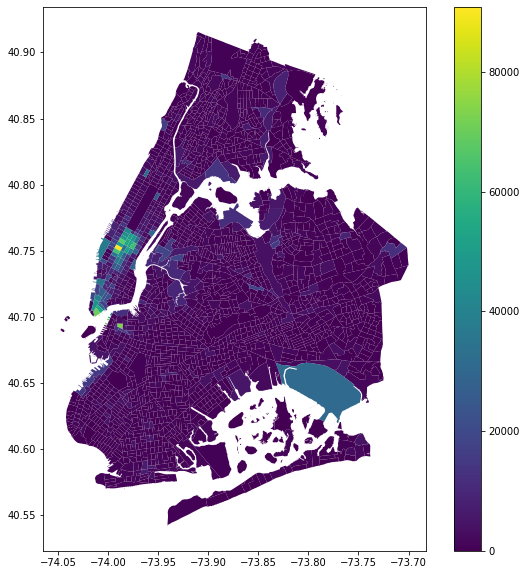

In [112]:
fig, ax = plt.subplots(figsize = (10,10))
tract_LEHD_final.plot(column = 'c000', ax = ax, legend = True)

In [113]:
tract_LEHD_final['Jobs_per_km2'] = tract_LEHD_final['c000'] / tract_LEHD_final['area_km2']
tract_LEHD_final.sort_values(by = 'Jobs_per_km2', ascending = False).head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry,c000,Jobs_per_km2
801,109,1,Manhattan,010900,1010900,I,MN17,Midtown-Midtown South,3807,5703.53176931,1891364.71422,36061010900,40.752251,-73.989703,0.175714,"POLYGON ((-73.98595 40.75232, -73.98640 40.751...",90785.0,516662.721379
1331,11,3,Brooklyn,001100,3001100,I,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,4004,5760.45786031,1814229.80572,36047001100,40.693292,-73.987710,0.168549,"POLYGON ((-73.98514 40.69489, -73.98517 40.694...",74081.0,439522.641535
415,119,1,Manhattan,011900,1011900,I,MN17,Midtown-Midtown South,3807,5722.09058919,1911310.53405,36061011900,40.757315,-73.986025,0.177567,"POLYGON ((-73.98226 40.75739, -73.98271 40.756...",67485.0,380053.143534
866,101,1,Manhattan,010100,1010100,I,MN17,Midtown-Midtown South,3807,5701.71560662,1891377.71142,36061010100,40.749731,-73.991537,0.175716,"POLYGON ((-73.98777 40.74979, -73.98797 40.749...",64109.0,364844.656733
797,94,1,Manhattan,009400,1009400,I,MN17,Midtown-Midtown South,3807,5738.94000015,1646379.18573,36061009400,40.755227,-73.977744,0.152954,"POLYGON ((-73.97444 40.75656, -73.97489 40.755...",52604.0,343919.827559


UnboundLocalError: local variable 'merged_kwds' referenced before assignment

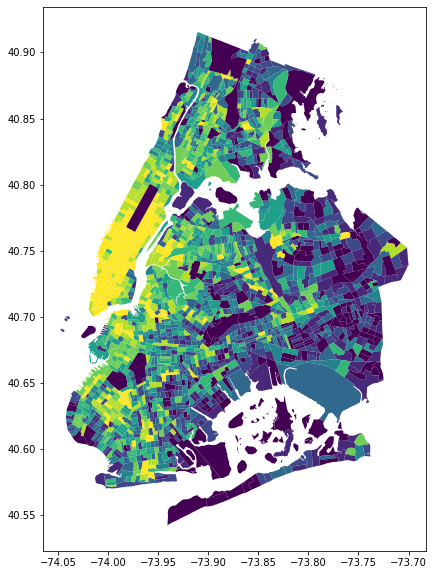

In [114]:
fig, ax = plt.subplots(figsize = (10,10))
tract_LEHD_final.plot(column = 'Jobs_per_km2',ax = ax, k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})
plt.title('Jobs per Square Km in NYC Census Tracts')
plt.show()

In [115]:
quant_thresh = pd.DataFrame(columns = ['Quantile', 'Jobs Threshold','Tracts', '% Total Jobs'])
quantiles = [0.75, 0.80, 0.85, 0.90, 0.95, 0.99]

for quantile in quantiles:
    jobs_per_km_threshold = tract_LEHD_final['Jobs_per_km2'].quantile(quantile)
    tract_count = len(tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= jobs_per_km_threshold])
    perc_tot = tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= jobs_per_km_threshold]['c000'].sum()/tract_LEHD_final['c000'].sum()
    
    # Append the results to the quant_thresh DataFrame
    quant_thresh.loc[len(quant_thresh)] = [quantile, jobs_per_km_threshold, tract_count, perc_tot]
quant_thresh

,Quantile,Jobs Threshold,Tracts,% Total Jobs
0,0.75,6252.089426,514.0,0.790279
1,0.80,7951.194581,411.0,0.749708
2,0.85,10482.480362,309.0,0.706933
3,0.90,17536.984739,206.0,0.649727
4,0.95,37432.088128,103.0,0.534795
5,0.99,199790.222958,21.0,0.242815


In [170]:
Top1 = tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= tract_LEHD_final['Jobs_per_km2'].quantile(0.99)]
Top5 = tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= tract_LEHD_final['Jobs_per_km2'].quantile(0.98)]
Top25 = tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= tract_LEHD_final['Jobs_per_km2'].quantile(0.75)]

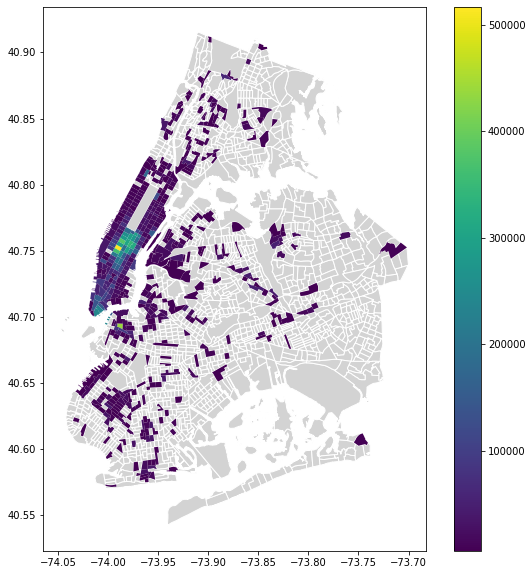

In [171]:
fig,ax = plt.subplots(figsize=(10,10)) #standardize scale!!
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'white')
Top25.plot(ax = ax, column='Jobs_per_km2', legend=True)
plt.show()

In [118]:
Top5.sort_values(by = 'Jobs_per_km2', ascending = False)

,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry,c000,Jobs_per_km2
801,109,1,Manhattan,010900,1010900,I,MN17,Midtown-Midtown South,3807,5703.53176931,1891364.71422,36061010900,40.752251,-73.989703,0.175714,"POLYGON ((-73.98595 40.75232, -73.98640 40.751...",90785.0,516662.721379
1331,11,3,Brooklyn,001100,3001100,I,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,4004,5760.45786031,1814229.80572,36047001100,40.693292,-73.987710,0.168549,"POLYGON ((-73.98514 40.69489, -73.98517 40.694...",74081.0,439522.641535
415,119,1,Manhattan,011900,1011900,I,MN17,Midtown-Midtown South,3807,5722.09058919,1911310.53405,36061011900,40.757315,-73.986025,0.177567,"POLYGON ((-73.98226 40.75739, -73.98271 40.756...",67485.0,380053.143534
866,101,1,Manhattan,010100,1010100,I,MN17,Midtown-Midtown South,3807,5701.71560662,1891377.71142,36061010100,40.749731,-73.991537,0.175716,"POLYGON ((-73.98777 40.74979, -73.98797 40.749...",64109.0,364844.656733
797,94,1,Manhattan,009400,1009400,I,MN17,Midtown-Midtown South,3807,5738.94000015,1646379.18573,36061009400,40.755227,-73.977744,0.152954,"POLYGON ((-73.97444 40.75656, -73.97489 40.755...",52604.0,343919.827559
1387,92,1,Manhattan,009200,1009200,I,MN19,Turtle Bay-East Midtown,3808,6172.97866764,2118430.91866,36061009200,40.753647,-73.974740,0.196809,"POLYGON ((-73.97122 40.75519, -73.97168 40.754...",62860.0,319395.192165
798,96,1,Manhattan,009600,1009600,I,MN17,Midtown-Midtown South,3807,5737.35624494,1887288.27946,36061009600,40.756375,-73.980886,0.175336,"POLYGON ((-73.97765 40.75791, -73.97812 40.757...",54152.0,308847.846709
598,82,1,Manhattan,008200,1008200,I,MN20,Murray Hill-Kips Bay,3808,5681.26086932,1856719.42526,36061008200,40.750614,-73.980873,0.172496,"POLYGON ((-73.97835 40.75241, -73.97779 40.752...",51772.0,300134.792314
800,112.02,1,Manhattan,011202,1011202,I,MN17,Midtown-Midtown South,3807,3688.7620093,839525.541256,36061011202,40.762604,-73.972131,0.077995,"POLYGON ((-73.96980 40.76291, -73.97026 40.762...",22889.0,293468.317037
2,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.03636707,1864600.43538,36061010400,40.760779,-73.977673,0.173228,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",50744.0,292932.284928


In [176]:
tract_LEHD_final.sort_values(by='Jobs_per_km2', ascending=False,inplace=True)
tract_LEHD_final['cum_%']=tract_LEHD_final['c000'].cumsum()/tract_LEHD_final['c000'].sum()

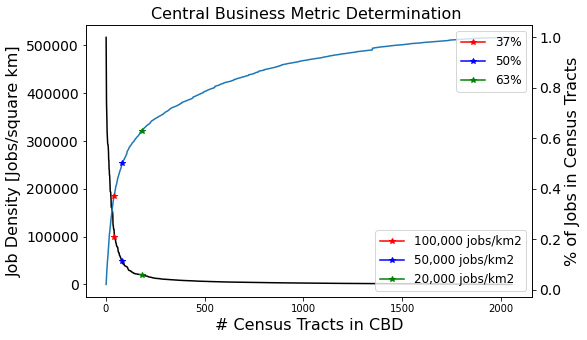

In [98]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()

ax1.plot(np.linspace(1,2056,2055),tract_LEHD_final['Jobs_per_km2'],color='black')
ax2.plot(np.linspace(1,2056,2055),tract_LEHD_final['cum_%']);

# plt.plot(np.linspace(1,2056,2055),tract_LEHD_final['Jobs_per_km2'])
ax1.set_ylabel('Job Density [Jobs/square km]',fontsize='16')
ax1.set_xlabel('# Census Tracts in CBD',fontsize='16')
ax1.set_title('Central Business Metric Determination ',fontsize='16')
ax1.plot(42,100000,marker='*',color='red',label='100,000 jobs/km2')
ax1.plot(80,50000,marker='*',color='blue',label='50,000 jobs/km2');
ax1.plot(182,20000,marker='*',color='green',label='20,000 jobs/km2')
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=12);
ax1.legend(fontsize=12, loc='lower right');
ax1.tick_params(axis='y', labelsize=14)
# plt.show()

# plt.plot(np.linspace(1,2056,2055),tract_LEHD_final['cum_%'])
ax2.set_ylabel('% of Jobs in Census Tracts',fontsize='16')
# plt.xlabel('# Census Tracts in CBD',fontsize='14')
# plt.title('% of Jobs Captured in CBD by Number of Census Tracts',fontsize='16')
ax2.plot(42,0.37,marker='*',color='red',label='37%')
ax2.plot(80,0.50,marker='*',color='blue',label='50%')
# ax2.set_xticks(fontsize=12)
# ax2.set_yticks(fontsize=12)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.plot(182,0.63,marker='*',color='green',label='63%')
ax2.legend(fontsize=12, loc='upper right');

# plt.show()

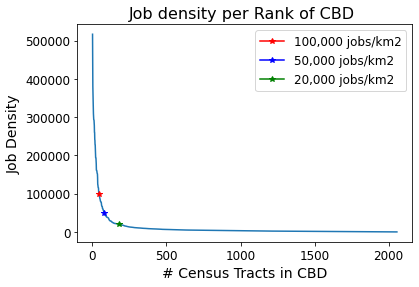

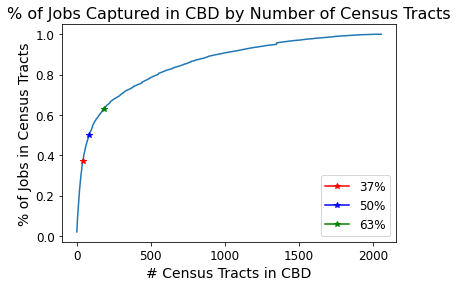

In [303]:
plt.plot(np.linspace(1,2056,2055),tract_LEHD_final['Jobs_per_km2'])
plt.ylabel('Job Density',fontsize='14')
plt.xlabel('# Census Tracts in CBD',fontsize='14')
plt.title('Job density per Rank of CBD ',fontsize='16')
plt.plot(42,100000,marker='*',color='red',label='100,000 jobs/km2')
plt.plot(80,50000,marker='*',color='blue',label='50,000 jobs/km2');
plt.plot(182,20000,marker='*',color='green',label='20,000 jobs/km2')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);
plt.legend(fontsize=12);
plt.show()

plt.plot(np.linspace(1,2056,2055),tract_LEHD_final['cum_%'])
plt.ylabel('% of Jobs in Census Tracts',fontsize='14')
plt.xlabel('# Census Tracts in CBD',fontsize='14')
plt.title('% of Jobs Captured in CBD by Number of Census Tracts',fontsize='16')
plt.plot(42,0.37,marker='*',color='red',label='37%')
plt.plot(80,0.50,marker='*',color='blue',label='50%')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);
plt.plot(182,0.63,marker='*',color='green',label='63%')
plt.legend(fontsize=12);

plt.show()

In [305]:
tract_LEHD_final[tract_LEHD_final['Jobs_per_km2']>50000]

,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry,c000,Jobs_per_km2,cum_%
801,109,1,Manhattan,010900,1010900,I,MN17,Midtown-Midtown South,3807,5703.53176931,1891364.71422,36061010900,40.752251,-73.989703,0.175714,"POLYGON ((-73.98595 40.75232, -73.98640 40.751...",90785.0,516662.721379,0.020308
1331,11,3,Brooklyn,001100,3001100,I,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,4004,5760.45786031,1814229.80572,36047001100,40.693292,-73.987710,0.168549,"POLYGON ((-73.98514 40.69489, -73.98517 40.694...",74081.0,439522.641535,0.036879
415,119,1,Manhattan,011900,1011900,I,MN17,Midtown-Midtown South,3807,5722.09058919,1911310.53405,36061011900,40.757315,-73.986025,0.177567,"POLYGON ((-73.98226 40.75739, -73.98271 40.756...",67485.0,380053.143534,0.051974
866,101,1,Manhattan,010100,1010100,I,MN17,Midtown-Midtown South,3807,5701.71560662,1891377.71142,36061010100,40.749731,-73.991537,0.175716,"POLYGON ((-73.98777 40.74979, -73.98797 40.749...",64109.0,364844.656733,0.066315
797,94,1,Manhattan,009400,1009400,I,MN17,Midtown-Midtown South,3807,5738.94000015,1646379.18573,36061009400,40.755227,-73.977744,0.152954,"POLYGON ((-73.97444 40.75656, -73.97489 40.755...",52604.0,343919.827559,0.078082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,49,1,Manhattan,004900,1004900,I,MN24,SoHo-TriBeCa-Civic Center-Little Italy,3810,6676.60615072,2226124.22506,36061004900,40.725057,-74.000473,0.206815,"POLYGON ((-73.99992 40.72693, -73.99912 40.726...",11134.0,53835.501002,0.481304
1326,39,1,Manhattan,003900,1003900,I,MN24,SoHo-TriBeCa-Civic Center-Little Italy,3810,12677.5664454,3618081.53674,36061003900,40.720796,-74.010797,0.336133,"POLYGON ((-74.00791 40.72370, -74.00794 40.723...",17289.0,51435.004017,0.485171
1236,41,1,Manhattan,004100,1004100,E,MN24,SoHo-TriBeCa-Civic Center-Little Italy,3810,5913.87065287,2058611.75326,36061004100,40.719164,-73.996696,0.191253,"POLYGON ((-73.99380 40.72094, -73.99384 40.720...",9720.0,50822.780894,0.487345
954,549,3,Brooklyn,054900,3054900,E,BK73,North Side-South Side,4001,6845.77708721,2097786.36242,36047054900,40.711154,-73.965733,0.194892,"POLYGON ((-73.96142 40.71135, -73.96181 40.710...",9870.0,50643.372409,0.489553


<AxesSubplot:>

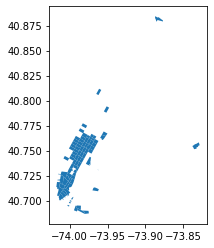

In [220]:
tract_LEHD_final[tract_LEHD_final['Jobs_per_km2']>50000].plot()

In [224]:
tract_LEHD_final[tract_LEHD_final['Jobs_per_km2']>50000].ntaname.unique()

array(['Midtown-Midtown South',
       'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill',
       'Turtle Bay-East Midtown', 'Murray Hill-Kips Bay',
       'Battery Park City-Lower Manhattan',
       'Hudson Yards-Chelsea-Flatiron-Union Square',
       'Morningside Heights', 'SoHo-TriBeCa-Civic Center-Little Italy',
       'Lenox Hill-Roosevelt Island', 'East Harlem South',
       'Upper East Side-Carnegie Hill', 'Gramercy', 'Clinton',
       'West Village', 'Brooklyn Heights-Cobble Hill', 'Lincoln Square',
       'Chinatown', 'East Village', 'Norwood', 'Fort Greene',
       'North Side-South Side', 'Flushing'], dtype=object)

In [254]:
cbd_22=tract_LEHD_final[tract_LEHD_final['Jobs_per_km2']>50000]
cbd_jobs=cbd_22[['ntacode','c000','area_km2']].groupby('ntacode').sum()
cbd_jobs['%_cbd_jobs']=cbd_jobs['c000']/(cbd_jobs['c000'].sum())
cbd_jobs

,c000,area_km2,%_cbd_jobs
ntacode,,,
BK09,13119.0,0.161585,0.005953
BK38,90452.0,0.336149,0.041043
BK68,9567.0,0.164809,0.004341
BK73,9870.0,0.194892,0.004479
BX43,15124.0,0.248715,0.006863
MN09,31654.0,0.178083,0.014363
MN13,205454.0,1.554135,0.093225
MN14,25866.0,0.350484,0.011737
MN15,41089.0,0.527848,0.018644


In [293]:
NTA= gpd.read_file('../Data/NTA_map/geo_export_292aeac6-132c-4390-a149-511353f27065.shp')
NTA['centroid'] = NTA.to_crs('+proj=cea').centroid.to_crs(4326)
NTA['Center_Lat'] = NTA['centroid'].y
NTA['Center_Lon'] = NTA['centroid'].x
NTA = NTA.drop(columns = 'centroid')
NTA=NTA[NTA['boroname']!='Staten Island']
NTA.head()

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry,Center_Lat,Center_Lon
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626...",40.620923,-73.956825
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700...",40.691507,-73.949905
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861...",40.858155,-73.899536
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",40.630949,-73.988661
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651...",40.652364,-73.922251


In [294]:
cbd_final_coords=cbd_jobs.merge(NTA, how='inner', on=None, left_on='ntacode', right_on='ntacode')
cbd_final_coords['jobs_km2']=cbd_final_coords['c000']/cbd_final_coords['area_km2']
cbd_final_coords= gpd.GeoDataFrame(cbd_final_coords, geometry = cbd_final_coords['geometry'])

cbd_final_coords.head()

,ntacode,c000,area_km2,%_cbd_jobs,borocode,boroname,countyfips,ntaname,shape_area,shape_leng,geometry,Center_Lat,Center_Lon,jobs_km2
0,BK09,13119.0,0.161585,0.005953,3.0,Brooklyn,047,Brooklyn Heights-Cobble Hill,9.984670e+06,14253.675375,"POLYGON ((-73.99236 40.68969, -73.99436 40.690...",40.695469,-73.994871,81189.237281
1,BK38,90452.0,0.336149,0.041043,3.0,Brooklyn,047,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,2.846257e+07,32363.990305,"POLYGON ((-73.97906 40.70595, -73.97906 40.705...",40.692921,-73.985990,269083.057942
2,BK68,9567.0,0.164809,0.004341,3.0,Brooklyn,047,Fort Greene,1.648290e+07,19828.474410,"POLYGON ((-73.96939 40.69608, -73.96938 40.695...",40.690795,-73.974881,58048.886737
3,BK73,9870.0,0.194892,0.004479,3.0,Brooklyn,047,North Side-South Side,2.886841e+07,28145.428770,"POLYGON ((-73.95814 40.72440, -73.95772 40.724...",40.714916,-73.958625,50643.372409
4,BX43,15124.0,0.248715,0.006863,2.0,Bronx,005,Norwood,1.570888e+07,22148.645113,"POLYGON ((-73.88309 40.86660, -73.88363 40.867...",40.877138,-73.879022,60808.524894


In [307]:
np.shape(cbd_final_coords)

(22, 14)

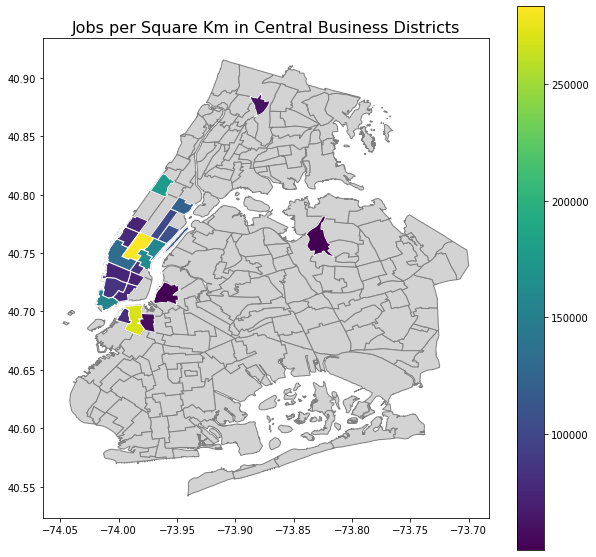

In [295]:
fig,ax = plt.subplots(figsize=(10,10)) #standardize scale!!
NTA.plot(ax = ax, color = 'lightgrey', edgecolor = 'grey')
cbd_final_coords.plot(ax = ax, column='jobs_km2', legend=True, edgecolor='white')
plt.title('Jobs per Square Km in Selected CBDs',fontsize=16)
plt.show()

In [297]:
cbd_final_coords[cbd_final_coords['%_cbd_jobs']>0.2]

,ntacode,c000,area_km2,%_cbd_jobs,borocode,boroname,countyfips,ntaname,shape_area,shape_leng,geometry,Center_Lat,Center_Lon,jobs_km2
9,MN17,794888.0,2.804878,0.360682,1.0,Manhattan,061,Midtown-Midtown South,3.019206e+07,27035.73813,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",40.755733,-73.983503,283394.821528


In [309]:
#cbd_final_coords.to_csv('../Data/NTA_CBD_final.csv')